In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg

In [5]:
df = pd.read_csv("Assignment_Dataset_Brandintelle_Final_Data.csv",parse_dates=['DATE'], index_col=['DATE'])

In [7]:
df.head()

,Sr No,Sales,TV_Spends,OOH_Spends,Print_Spends,FB_Spends,FB_Impressions,Search_Spends,Paid_Search_Clicks,competitor_sales_B,events
DATE,,,,,,,,,,,
2015-11-23,1,2754371,167687,0,95463,228213,72903852,0,0,8125009,na
2015-11-30,2,2584276,214600,0,0,34258,16581099,31000,29511,7901549,na
2015-12-07,3,2547386,0,248022,3404,127691,49954773,28400,36132,8300197,event0
2015-12-14,4,2875220,625877,0,132600,84014,31649297,31900,36804,8122883,na
2015-12-21,5,2215953,0,520005,0,20687,8802269,27100,28401,7105985,na


In [25]:
df.tail(15)

,Sr No,Sales,TV_Spends,OOH_Spends,Print_Spends,FB_Spends,FB_Impressions,Search_Spends,Paid_Search_Clicks,competitor_sales_B,events
DATE,,,,,,,,,,,
2019-08-05,194,1843118,97574,0,0,462011,178298272,81100,104317,5672763,na
2019-08-12,195,1443773,0,63650,0,0,0,0,0,4783227,na
2019-08-19,196,1397435,0,0,24152,292347,98316054,0,0,4520254,na
2019-08-26,197,1930413,0,72229,0,0,0,97400,113575,6397749,na
2019-09-02,198,2106968,1698,0,102983,121138,40745397,96000,117697,6637702,na
2019-09-09,199,2233758,369508,7959,0,0,0,103200,137929,6774864,na
2019-09-16,200,2575148,0,21491,109532,39926,18984811,120700,155722,8116568,na
2019-09-23,201,2510951,208627,0,0,0,0,115700,145612,7702931,na
2019-09-30,202,2275620,0,58979,147067,0,0,110100,129677,7060116,event6


In [10]:
df_sales = df[['Sales']]
df_sales

,Sales
DATE,
2015-11-23,2754371
2015-11-30,2584276
2015-12-07,2547386
2015-12-14,2875220
2015-12-21,2215953
...,...
2019-10-14,2456240
2019-10-21,2182825
2019-10-28,2377706


In [12]:
X = df_sales.values
print('Shape of data \t', df_sales.shape)
print('Orignal Dataset:\n', df_sales.head())
print('After Extracting only temperature:\n', X)

Shape of data 	 (208, 1)
Orignal Dataset:
               Sales
DATE               
2015-11-23  2754371
2015-11-30  2584276
2015-12-07  2547386
2015-12-14  2875220
2015-12-21  2215953
After Extracting only temperature:
 [[2754371]
 [2584276]
 [2547386]
 [2875220]
 [2215953]
 [2569921]
 [2171506]
 [2464131]
 [2012520]
 [1738911]
 [1772306]
 [1809058]
 [1952740]
 [1507805]
 [1510391]
 [1588840]
 [1605990]
 [1356010]
 [2103936]
 [1120835]
 [1141140]
 [1166880]
 [ 888806]
 [ 898873]
 [ 889373]
 [1915375]
 [1006845]
 [ 869198]
 [ 727250]
 [ 753730]
 [ 999196]
 [ 845843]
 [1126016]
 [1140978]
 [1242656]
 [1293483]
 [1484843]
 [1485698]
 [1556608]
 [1391206]
 [2018783]
 [2170721]
 [2247670]
 [2192026]
 [1895213]
 [2232910]
 [2406035]
 [2252445]
 [2663125]
 [2974771]
 [2826128]
 [3182900]
 [2964696]
 [2848525]
 [2740160]
 [2380508]
 [2230915]
 [3659425]
 [2827008]
 [2042143]
 [2113358]
 [2179918]
 [2370613]
 [1814556]
 [1951668]
 [1918238]
 [1472390]
 [1477865]
 [1300166]
 [1160205]
 [1356871]


<AxesSubplot:xlabel='DATE'>

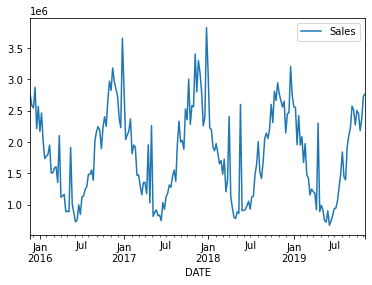

In [16]:
df_sales.plot()

### Check for Stationarity

In [17]:
from statsmodels.tsa.stattools import adfuller

df_sales_test = adfuller(df_sales['Sales'], autolag = 'AIC')

print("1. ADF : ",df_sales_test[0])
print("2. P-Value : ",df_sales_test[1])
print("3. Num of Lags : ",df_sales_test[2])
print("4. Num of Observations Used For ADF Regrestion and Critical Values Calculation : ",df_sales_test[3])
print("5. Critical Values : ")
for key, val in df_sales_test[4].items():
    print("\t",key, ": ", val)


1. ADF :  -5.736818696706658
2. P-Value :  6.409857208353513e-07
3. Num of Lags :  14
4. Num of Observations Used For ADF Regrestion and Critical Values Calculation :  193
5. Critical Values : 
	 1% :  -3.4646940755442612
	 5% :  -2.8766348847254934
	 10% :  -2.5748163958763994


C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


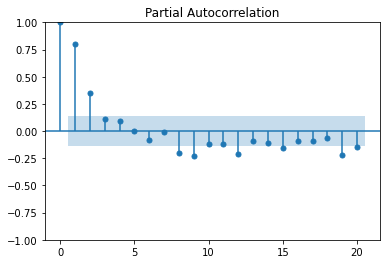

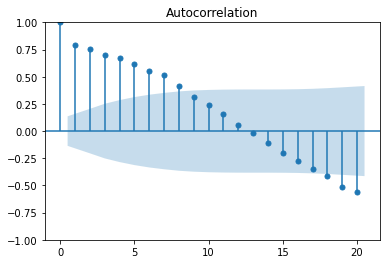

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf = plot_pacf(df_sales['Sales'],lags = 20)
acf = plot_acf(df_sales['Sales'],lags = 20)

### Split Dataset into Train and Test: Testing: Last 7 Weeks

In [46]:
train = X[:len(X)-6]
test = X[len(X)-6:]

In [47]:
model = AutoReg(train,lags = 10).fit()

In [48]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  202
Model:                    AutoReg(10)   Log Likelihood               -2738.746
Method:               Conditional MLE   S.D. of innovations         379028.275
Date:                Tue, 25 Apr 2023   AIC                           5501.493
Time:                        12:19:09   BIC                           5540.583
Sample:                            10   HQIC                          5517.325
                                  202                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.364e+05   8.81e+04      3.818      0.000    1.64e+05    5.09e+05
y.L1           0.3906      0.071      5.464      0.000       0.250       0.531
y.L2           0.2704      0.076      3.571      0.0

In [49]:
print(test)

[[2505161]
 [2456240]
 [2182825]
 [2377706]
 [2732825]
 [2767788]]


In [50]:
print(len(train))

202


- Make Predictions on Test Set and Compare

In [51]:
pred = model.predict(start=len(train), end=len(X)-1, dynamic=False)

[2337195.48820805 2474988.64303777 2609317.93202756 2589073.5034743
 2559809.05133457 2502379.31111591]


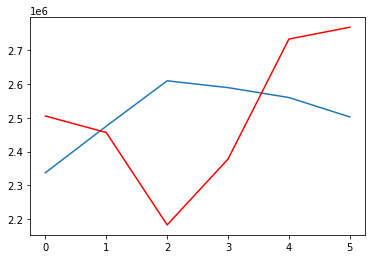

In [52]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test,color = 'red')
print(pred)

- Calculate Error

In [53]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, pred))

In [54]:
print(rmse)

243417.5623592405


- Making Future Predictions

In [56]:
pred_future = model.predict(start=len(X)+1,end=len(X)+6, dynamic = False)
print("The future prediction for the next month")
print(pred_future)
print("Number of Predictions Mode: \t", len(pred_future))

The future prediction for the next month
[2339532.37196483 2349764.31905202 2348639.52832624 2280154.72909417
 2188078.74557511 2106400.56395539]
Number of Predictions Mode: 	 6
